# What is Perceptron? And How does it Work?

# What is the significance of Cost/Loss Function?

# What is Gradient Descent?

# 1. Intro


---

# 2. What is ANN & SLP?
### 2-1) ANN(Artificial Neural Network)
* The Artificial Neural Network consists of an input layer, a hidden layer, and an output layer.

![Imgur](https://elogeel.files.wordpress.com/2010/05/050510_1627_multilayerp1.png)



### 2-2) SLP(Single Layer Perceptron)

* If ANN model has no hidden layer, it is called single layer perceptron. 
* In contrast, MLP(Multiple Layer Perceptron) model is ANN which has multiple hidden layers (more than 1) 


![Imgur](https://www.analyticsvidhya.com/wp-content/uploads/2016/07/SLP.png)



### 2-3) Basic equation of ANN-SLP
* **Output = Weight * Input + Bias**
* For this equation, we already have output, input layers. But don't have weight value and bias value.
* Weight : a value that can give different weights depending on features and output 
    => [len(features), len(output)]
* bias : a value that can give different weights depending on features
    => [len(output)]




### 2-4) One-Hot Encoding

* This **ZOO DATASET** result is consisted of 7 types.

*(1: mammal, 2: bird, 3: reptile, 4: fish, 5: amphibian, 6: insect / arachnid, 7: invertebrate)*

* If the prediction results are more than 2 factors, It is more comforable using one-hot encoding.
* For example, in official test, we write our answer in OMR card, cuz is much more easier for computer to read answers.

![Imgur](https://chrisalbon.com/images/machine_learning_flashcards/One-Hot_Encoding_print.png)


---

# 3. Import Libraries

In [57]:
#!pip install tensorflow

In [4]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

---

# 4. Explore Dataset
## 4-1) Import dataset

In [9]:
zoo = pd.read_csv("zoo.csv")
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [10]:
print("This ZOO dataset is consised of",len(zoo),"rows.")

This ZOO dataset is consised of 101 rows.


## 4-2) Summary the animal_type

<AxesSubplot:xlabel='class_type', ylabel='count'>

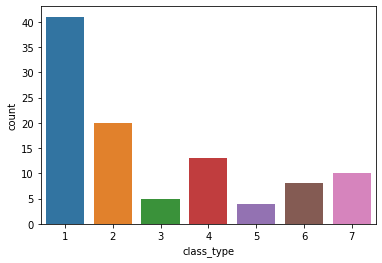

In [11]:
sns.countplot(zoo['class_type'],label="Count")

## 4-3) Correlation Plot of 16 features

Text(0.5, 1.0, 'Correlation of ZOO Features')

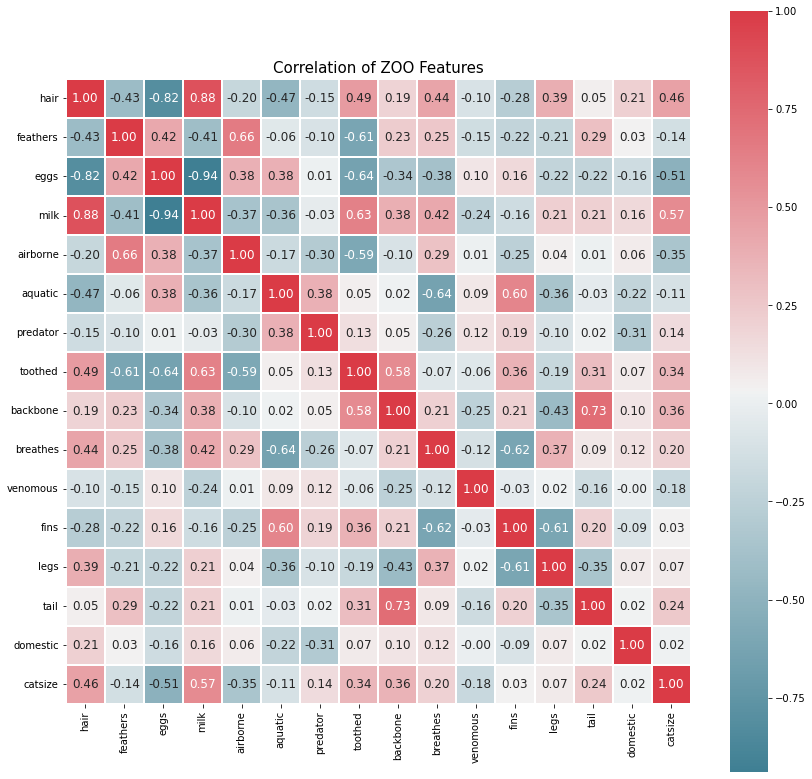

In [15]:
corr = zoo.iloc[:,1:-1].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of ZOO Features', y=1.0, size=15) 

---

# 5. Prepare Data for machine learning
## 5-1) Seperate Feature data(17) / Label data(1)
Eliminate **animal_name** columns for predictions.
Seperate by **x_data, y_data**
* x_data : columns(features to predict class_type) for training. (eliminate class_type)
* y_data : columns for comparing with predictions results. (need original class_type)

In [16]:
x_data = zoo.iloc[:,:-1]
x_data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [17]:
y_data = zoo.iloc[:,-1:]
y_data.head()

,class_type
0,1
1,1
2,4
3,1
4,1


In [18]:
print("Feature Data :", x_data.shape)
print("Label Data :", y_data.shape)

Feature Data : (101, 17)
Label Data : (101, 1)


## 5-2) Divide "ZOO data" into Train(70%) / Test data(30%)
Divide the data into two(train/test) to see the predictive power of the model.
* test_size : proportion of test data (0.3 means split into 30% test data, and the rest(70%) is train data)
* random_state : you can handle the fix dataset everytime, you can write any number you like :-)
* stratify : split data randomly and y variable(7 class_type) proportionately

In [19]:
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.3, random_state=42, stratify=y_data)
print("Training Data has",train_x.shape)
print("Testing Data has",test_x.shape)

Training Data has (70, 17)
Testing Data has (31, 17)


## 5-3) Drop animal_name column
* Save the **animal_name** column for later combination(results).
* Drop the **animal_name** column in train, test datasets, because it's unnecessary for model learning predictions.

In [20]:
train_name = train_x['animal_name']
test_name = test_x['animal_name']

train_x = train_x.iloc[:,1:]
test_x = test_x.iloc[:,1:]

print("Training Data has",train_x.shape)
print("Testing Data has",test_x.shape)

Training Data has (70, 16)
Testing Data has (31, 16)


---

# 6. Make ANN-SLP Model
## 6-1) Make "Placeholder" for dynamic variable allocation
Placeholder is one of the function in tensorflow.
It is a space to put and change values while the program is running.
* for X, a place must have 16 columns, since zoo data has 16 features.
* for Y, a place must have 1 columns, since the results has 1 outcome.
* If you see the row "None", it means it has no size limits. (You can write -1 instead of "None")

In [21]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [22]:
X = tf.placeholder(tf.float32, [None,16]) 
Y = tf.placeholder(tf.int32, [None, 1])

## 6-2) One-Hot Encoding variable
As I explained above, for one-hot encoding, we have to change **y_data form** in to **y -one hot encoding** form. 

You can simply use **tensorflow one_hot** function.
* y_data(type results) has 7 factors, so we will make place with 7 columns. **-1** means **no size limits** of rows.

In [36]:
Y_one_hot = tf.one_hot(Y, 7)  # one hot encoding

In [37]:
Y_one_hot

<tf.Tensor 'one_hot_3:0' shape=(?, 1, 7) dtype=float32>

In [38]:
Y_one_hot.shape

TensorShape([Dimension(None), Dimension(1), Dimension(7)])

In [39]:
Y_one_hot = tf.reshape(Y_one_hot, [-1, 7])

In [41]:
Y_one_hot.shape

TensorShape([Dimension(None), Dimension(7)])

In [40]:
Y_one_hot_c= tf.reshape(Y_one_hot, [7, -1])

In [43]:
Y_one_hot_c.shape

TensorShape([Dimension(7), Dimension(None)])

## 6-3) Make Weight, Bias value with randomly
* W(weight) : why **[16,7]**?  16 for 16 features, 7 for 7 types of Outcome(results).
* b(bias) : why **[7]**?  outcome has 7 layers(types).

In [45]:
W = tf.Variable(tf.random_normal([16, 7],seed=0), name='weight') #[features,output classes]
b = tf.Variable(tf.random_normal([7],seed=0), name='bias') # output classes

## 6-4) Make Output Results
 * **Output = Weight * Input + Bias**
 * tf.matmul() : for array multiply
 * tf.nn.softmax_cross_entropy_with_logits(): for gradient_descent with softmax results(hypothesis).

In [46]:
X.shape

TensorShape([Dimension(None), Dimension(16)])

In [47]:
W.shape

TensorShape([Dimension(16), Dimension(7)])

In [48]:
logits = tf.matmul(X, W) + b
# hypothesis = tf.nn.softmax(logits)

## 6-5) Cross Entropy
Before this, you have to know **How Linear Regression Works**
* Linear Regression: Draw a random line to find the **mean square root error** and find the slope and intercept to minimize this value (reduce the error to the minimum)
* Since Logits is also linear equation, you have to find minimum cost!

![Imgur](https://machinelearningblogcom.files.wordpress.com/2018/01/bildschirmfoto-2018-01-24-um-14-32-02.png?w=1400)

For example, logits(we get above) is **red line**, and the real dataset is **blue dot**. 
1. For finding cost, you have to substract all blue dot value with red line. 
2. Next, You add all distance you find and get average. 
3. For good prediction, this average distance of red line & blue dot must be minimum value. 

In [49]:
hypothesis = tf.nn.softmax(logits)

cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)
# cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis)))

## 6-6) Gradient Descent Optimizer

![Imgur](http://sebastianraschka.com/images/blog/2015/singlelayer_neural_networks_files/perceptron_gradient_descent_1.png)

* GradientDescentOptimizer: It makes the best result with the least error
* There are lots of optimizer methods provided in tensorflow. (GradientDescent, Adam, RMSProp, etc.)
* learning rate : It indicates the degree of descending size.

![Imgur](https://pbs.twimg.com/media/DK26ibcXUAEOwel.jpg)


In [54]:
#train  = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(cost)
train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost) 

## 6-7) Compare : original vs. prediction
* tf.argmax() : since hypothesis is one-hot encoding(with 7 layers) you have to find max softmax results. 
(It returns the index value of the array with the largest probability)

In [55]:
prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

---

# 7. Activate Model


In [56]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(5001):
        sess.run(train, feed_dict={X: train_x, Y: train_y})
        if step % 1000 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
            
    train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
    test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: test_x, Y: test_y})
    print("Model Prediction =", train_acc)
    print("Test Prediction =", test_acc)

Step:     0	Loss: 3.431	Acc: 30.00%
Step:  1000	Loss: 0.022	Acc: 91.43%
Step:  2000	Loss: 0.015	Acc: 91.43%
Step:  3000	Loss: 0.013	Acc: 91.43%
Step:  4000	Loss: 0.012	Acc: 91.43%
Step:  5000	Loss: 0.011	Acc: 91.43%
Model Prediction = 0.9142857
Test Prediction = 0.83870965


---

# 8. Show Results

In [53]:
sub = pd.DataFrame()
sub['Name'] = test_name
sub['Predict_Type'] = test_predict
sub['Origin_Type'] = test_y
sub['Correct'] = test_correct
sub

,Name,Predict_Type,Origin_Type,Correct
100,wren,2,2,True
58,penguin,2,2,True
43,lark,2,2,True
21,duck,2,2,True
10,cheetah,1,1,True
40,housefly,6,6,True
50,mongoose,1,1,True
4,boar,1,1,True
87,swan,2,2,True
80,slowworm,3,3,True


---

# 9. Conclusion
You can make your own ANN model with modifying **learning_rate, step range**.